# Amazon Reviews DataSet

In [1]:
import numpy as np
import pandas as pd
import os
import random
import string

In [2]:
amazon_review_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte 6 chptr material/assignments/amazon_review_sentiments_analyses/train.ft.txt'
train_dir =open(os.path.join(amazon_review_dir, 'train.ft.txt'),encoding="utf8")

# Preprocessing Dataset
#### Texts And Labels Splits separately in lists

In [3]:
texts=[]
labels=[]

In [4]:
for line in train_dir:
    line=line.rstrip()
    label=line[0:10]
    text=line[10:]
    l=[]
    if label=="__label__2":
        labels.append(1)
    else:
        labels.append(0)
    texts.append(text)

In [5]:
print(len(texts))
print(len(labels))

3600000
3600000


In [6]:
texts[0]

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [7]:
text=texts[0].split()
len(text)

80

In [8]:
text=texts[:200000]

In [9]:
print(len(text))

200000


In [10]:
cleaned_text=[]

In [11]:
c=0
f = open("clean.txt",encoding="utf8")
for lis in f:
    lis=lis.rstrip()
    cleaned_text.append(lis)
    c+=1
f.close()
print(c)

200000


In [12]:
s=cleaned_text[3]
print(s)

s=s.split()
print(len(s))

excellent soundtrack truly like soundtrack enjoy video game music played game music enjoy truly relaxing peacefulon disk one favorites scars time life death forest illusion fortress ancient dragons lost fragment drowned valleydisk two draggons galdorb home chronomantique prisoners fate gale girlfriend likes zelbessdisk three best three garden god chronopolis fates jellyfish sea burning orphange dragons prayer tower stars dragon god radical dreamers unstealable jeweloverall excellent soundtrack brought like video game musicxander cross
72


# Preprocessing Data

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



Using TensorFlow backend.


In [14]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(cleaned_text)
sequences = tokenizer.texts_to_sequences(cleaned_text)
data = pad_sequences(sequences, maxlen=60)
labels = np.asarray(labels)

In [15]:
maxlen = 60 #ts off reviews after 100 words
training_samples = 160000#Trains on 200 samples
validation_samples = 30000
test_sample=10000#Validates on 10,000 samples
max_words = 20000 #Considers only the top20,000 words in the dataset


In [16]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 295599 unique tokens.
Shape of data tensor: (200000, 60)
Shape of label tensor: (3600000,)


In [17]:
word_index

{'book': 1,
 'one': 2,
 'like': 3,
 'great': 4,
 'good': 5,
 'movie': 6,
 'read': 7,
 'would': 8,
 'time': 9,
 'get': 10,
 'dont': 11,
 'really': 12,
 'first': 13,
 'even': 14,
 'much': 15,
 'love': 16,
 'well': 17,
 'best': 18,
 'story': 19,
 'album': 20,
 'better': 21,
 'cd': 22,
 'buy': 23,
 'could': 24,
 'think': 25,
 'also': 26,
 'way': 27,
 'many': 28,
 'im': 29,
 'film': 30,
 'new': 31,
 'little': 32,
 'ever': 33,
 'work': 34,
 'see': 35,
 'books': 36,
 'never': 37,
 'music': 38,
 'bad': 39,
 'know': 40,
 'make': 41,
 'still': 42,
 'product': 43,
 'people': 44,
 'bought': 45,
 'back': 46,
 'use': 47,
 'made': 48,
 'two': 49,
 'got': 50,
 'reading': 51,
 'want': 52,
 'dvd': 53,
 'money': 54,
 'years': 55,
 'didnt': 56,
 'old': 57,
 'ive': 58,
 'find': 59,
 'say': 60,
 'recommend': 61,
 'life': 62,
 'cant': 63,
 'go': 64,
 'songs': 65,
 'every': 66,
 'found': 67,
 'another': 68,
 'characters': 69,
 'quality': 70,
 'thought': 71,
 'worth': 72,
 'put': 73,
 'something': 74,
 'used':

In [18]:
indices = np.arange(data.shape[0]) #Splits the data into a training set and a validation set, but first shuffles the data,because you’re starting with data in whichsamples are ordered (all negative first, then/all positive)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test=data[190000:200000]
y_test=labels[190000:200000]

In [19]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

160000
160000
10000
10000


# Parsing the GloVe word-embeddings file

In [22]:
glove_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte 6 chptr material/datasets/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


# Preparing the GloVe word-embeddings matrix¶

In [23]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector #Words not found in the embedding index will be all zeros.

# Model definition

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Dropout
from keras import regularizers
#kernel_regularizer=regularizers.l2(0.001),
pre_model = Sequential()
pre_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
pre_model.add(Flatten())
pre_model.add(Dropout(0.5))
pre_model.add(Dense(64, activation='relu'))
pre_model.add(Dense(1, activation='sigmoid'))
pre_model.summary()

NameError: name 'embedding_dim' is not defined

# Loading pretrained word embeddings into the Embedding layer

In [25]:
pre_model.layers[0].set_weights([embedding_matrix])
pre_model.layers[0].trainable = False
pre_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 100)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                384064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,384,129
Trainable params: 384,129
Non-trainable params: 2,000,000
_________________________________________________________________


# Training and evaluation¶

In [26]:
pre_model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


In [27]:
pre_history = pre_model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_val, y_val))

Train on 160000 samples, validate on 30000 samples
Epoch 1/10
160000/160000 [==============================] - 22s 137us/step - loss: 0.5460 - acc: 0.7224 - val_loss: 0.4825 - val_acc: 0.7732
Epoch 2/10
160000/160000 [==============================] - 21s 134us/step - loss: 0.5052 - acc: 0.7509 - val_loss: 0.4764 - val_acc: 0.7766
Epoch 3/10
160000/160000 [==============================] - 21s 133us/step - loss: 0.4877 - acc: 0.7640 - val_loss: 0.4700 - val_acc: 0.7834
Epoch 4/10
160000/160000 [==============================] - 21s 133us/step - loss: 0.4720 - acc: 0.7737 - val_loss: 0.4679 - val_acc: 0.7789
Epoch 5/10
160000/160000 [==============================] - 21s 133us/step - loss: 0.4568 - acc: 0.7831 - val_loss: 0.4607 - val_acc: 0.7836
Epoch 6/10
160000/160000 [==============================] - 21s 133us/step - loss: 0.4455 - acc: 0.7893 - val_loss: 0.4727 - val_acc: 0.7688
Epoch 7/10
160000/160000 [==============================] - 21s 134us/step - loss: 0.4320 - acc: 0.7979

# Plotting the results

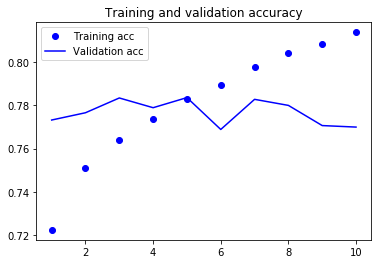

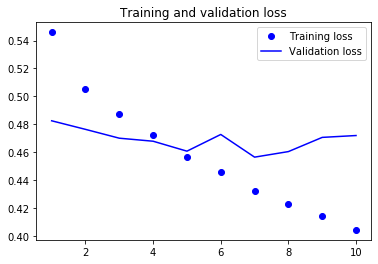

In [30]:
import matplotlib.pyplot as plt
acc = pre_history.history['acc']
val_acc = pre_history.history['val_acc']
loss = pre_history.history['loss']
val_loss = pre_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
pre_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 39us/step


[0.47590928773880004, 0.7699000239372253]

In [32]:
#pre_model.load_weights('pre_trained_Amazon_model.h5')
#pre_model.evaluate(x_test, y_test)

# Training the same model without pretrained word embeddings

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras import regularizers
#kernel_regularizer=regularizers.l2(0.001),
Notpre_model = Sequential()
Notpre_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
Notpre_model.add(Flatten())
Notpre_model.add(Dropout(0.5))
Notpre_model.add(Dense(128,kernel_regularizer=regularizers.l2(0.1),activation='relu'))
Notpre_model.add(Dense(1, activation='sigmoid'))
Notpre_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 100)           2000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               768128    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 2,768,257
Trainable params: 2,768,257
Non-trainable params: 0
_________________________________________________________________


In [37]:
Notpre_model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


In [38]:
Notpre_history = Notpre_model.fit(x_train, y_train,
epochs=10,
batch_size=1000,
validation_data=(x_val, y_val))

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160000 samples, validate on 30000 samples
Epoch 1/10
160000/160000 [==============================] - 28s 174us/step - loss: 1.4490 - acc: 0.7444 - val_loss: 0.4875 - val_acc: 0.8568
Epoch 2/10
160000/160000 [==============================] - 28s 174us/step - loss: 0.4365 - acc: 0.8640 - val_loss: 0.4122 - val_acc: 0.8652
Epoch 3/10
160000/160000 [==============================] - 28s 175us/step - loss: 0.3889 - acc: 0.8754 - val_loss: 0.4047 - val_acc: 0.8633
Epoch 4/10
160000/160000 [==============================] - 28s 176us/step - loss: 0.3743 - acc: 0.8807 - val_loss: 0.4054 - val_acc: 0.8647
Epoch 5/10
160000/160000 [==============================] - 28s 173us/step - loss: 0.3666 - acc: 0.8825 - val_loss: 0.3955 - val_acc: 0.8715
Epoch 6/10
160000/160000 [==============================] - 28s 177us/step - loss: 0.3604 - acc: 0.8853 - val_loss: 0.3860 - val_acc: 0.8697
Epoch 7/10
160000/160000 [==============================] - 28s 177us/step - loss: 0.3563 - acc: 0.8870

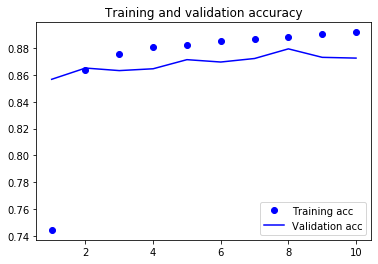

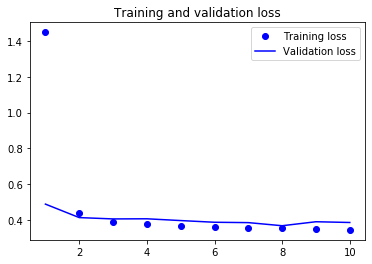

In [39]:
import matplotlib.pyplot as plt
acc = Notpre_history.history['acc']
val_acc = Notpre_history.history['val_acc']
loss = Notpre_history.history['loss']
val_loss = Notpre_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
Notpre_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 93us/step


[0.39725998764038084, 0.8715000152587891]

# We can see that it takes more epochs before the reduced model starts overfitting. The validation loss also goes up slower than our first model.

In [41]:
'''def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):
    
    Function to compare a metric between two models 
    
    Parameters:
        model_hist_1 : training history of model 1
        model_hist_2 : training history of model 2
        metrix : metric to compare, loss, acc, val_loss or val_acc
        
    Output:
        plot of metrics of both models
    
    metric_model_1 = model_hist_1.history[metric]
    metric_model_2 = model_hist_2.history[metric]
    e = range(1, 10 + 1)
    
    metrics_dict = {
        'acc' : 'Training Accuracy',
        'loss' : 'Training Loss',
        'val_acc' : 'Validation accuracy',
        'val_loss' : 'Validation loss'
    }
metric_label = metrics_dict[metric]
plt.plot(e, metric_model_1, 'bo', label=model_1.name)
plt.plot(e, metric_model_2, 'b', label=model_2.name)
plt.xlabel('Epoch number')
plt.ylabel(metric_label)
plt.title('Comparing ' + metric_label + ' between models')
plt.legend()
plt.show()'''

"def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):\n    \n    Function to compare a metric between two models \n    \n    Parameters:\n        model_hist_1 : training history of model 1\n        model_hist_2 : training history of model 2\n        metrix : metric to compare, loss, acc, val_loss or val_acc\n        \n    Output:\n        plot of metrics of both models\n    \n    metric_model_1 = model_hist_1.history[metric]\n    metric_model_2 = model_hist_2.history[metric]\n    e = range(1, 10 + 1)\n    \n    metrics_dict = {\n        'acc' : 'Training Accuracy',\n        'loss' : 'Training Loss',\n        'val_acc' : 'Validation accuracy',\n        'val_loss' : 'Validation loss'\n    }\nmetric_label = metrics_dict[metric]\nplt.plot(e, metric_model_1, 'bo', label=model_1.name)\nplt.plot(e, metric_model_2, 'b', label=model_2.name)\nplt.xlabel('Epoch number')\nplt.ylabel(metric_label)\nplt.title('Comparing ' + metric_label + ' between models')\nplt.legend

In [42]:
#compare_models_by_metric(pre_model, Notpre_model, pre_history, Notpre_history, 'val_loss')

# Training the model with Embedding and SimpleRNN layers


In [45]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,SimpleRNN
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(512,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(SimpleRNN(32,dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [46]:
history = model.fit(x_train, y_train,
epochs=15,
batch_size=64,
validation_data=(x_val, y_val))

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160000 samples, validate on 30000 samples
Epoch 1/15
160000/160000 [==============================] - 592s 4ms/step - loss: 0.7021 - acc: 0.5001 - val_loss: 0.6944 - val_acc: 0.4963
Epoch 2/15
160000/160000 [==============================] - 565s 4ms/step - loss: 0.6833 - acc: 0.5357 - val_loss: 0.6317 - val_acc: 0.6548
Epoch 3/15
160000/160000 [==============================] - 566s 4ms/step - loss: 0.5781 - acc: 0.6992 - val_loss: 0.5164 - val_acc: 0.7560
Epoch 4/15
160000/160000 [==============================] - 573s 4ms/step - loss: 0.5339 - acc: 0.7398 - val_loss: 0.5014 - val_acc: 0.7630
Epoch 5/15
160000/160000 [==============================] - 584s 4ms/step - loss: 0.5030 - acc: 0.7609 - val_loss: 0.4497 - val_acc: 0.8014
Epoch 6/15
160000/160000 [==============================] - 590s 4ms/step - loss: 0.4854 - acc: 0.7760 - val_loss: 0.4934 - val_acc: 0.7822
Epoch 7/15
160000/160000 [==============================] - 596s 4ms/step - loss: 0.4773 - acc: 0.7802 - val_

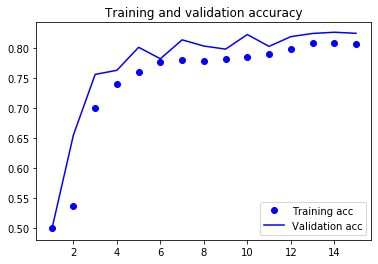

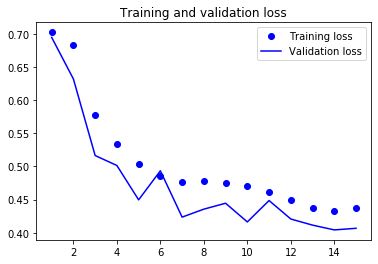

In [47]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 945us/step


[0.40835702576637267, 0.8203999996185303]

# Training the model with Embedding and LSTM layers

In [20]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,SimpleRNN
from keras.layers import Dropout
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(512, dropout=0.5,return_sequences=True, recurrent_dropout=0.5))
model.add(LSTM(128, dropout=0.5,return_sequences=True, recurrent_dropout=0.5))
model.add(LSTM(128, dropout=0.5,return_sequences=True, recurrent_dropout=0.5))
model.add(LSTM(64, dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


In [21]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


In [22]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))


C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160000 samples, validate on 30000 samples
Epoch 1/10
160000/160000 [==============================] - 3513s 22ms/step - loss: 0.3573 - acc: 0.8451 - val_loss: 0.2834 - val_acc: 0.8827
Epoch 2/10
160000/160000 [==============================] - 4218s 26ms/step - loss: 0.2800 - acc: 0.8877 - val_loss: 0.2803 - val_acc: 0.8874
Epoch 3/10
160000/160000 [==============================] - 3418s 21ms/step - loss: 0.2641 - acc: 0.8956 - val_loss: 0.2636 - val_acc: 0.8953
Epoch 4/10
160000/160000 [==============================] - 3483s 22ms/step - loss: 0.2559 - acc: 0.9001 - val_loss: 0.2718 - val_acc: 0.8925
Epoch 5/10
160000/160000 [==============================] - 3399s 21ms/step - loss: 0.2507 - acc: 0.9027 - val_loss: 0.2672 - val_acc: 0.8960
Epoch 6/10
160000/160000 [==============================] - 3855s 24ms/step - loss: 0.2468 - acc: 0.9053 - val_loss: 0.2685 - val_acc: 0.8953
Epoch 7/10
160000/160000 [==============================] - 3579s 22ms/step - loss: 0.2436 - acc:

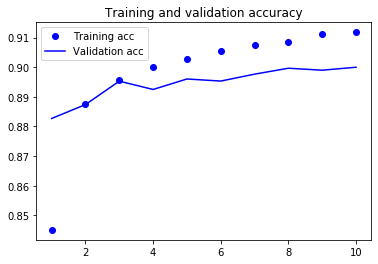

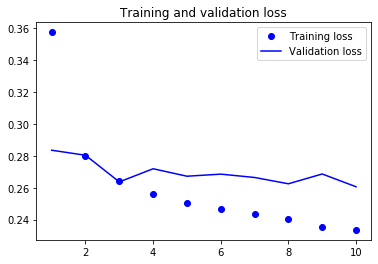

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 101s 10ms/step


[0.2551916035294533, 0.9027000069618225]

In [26]:
model.save('Amazon_text_classification.h5')

# Listing 6.43 Training and evaluating a bidirectional LSTM

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Dropout
from keras import layers
from keras import regularizers
model = Sequential()
model.add(layers.Embedding(max_words, 100))
model.add(layers.Bidirectional(layers.LSTM(512,dropout=0.5,return_sequences=True, recurrent_dropout=0.5)))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160000 samples, validate on 30000 samples
Epoch 1/10
160000/160000 [==============================] - 18623s 116ms/step - loss: 0.3205 - acc: 0.8634 - val_loss: 0.2696 - val_acc: 0.8886
Epoch 2/10
126464/160000 [======================>.......] - ETA: 1:37:08 - loss: 0.2580 - acc: 0.8953

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)


In [27]:
from keras.layers import GRU
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(GRU(128,dropout=0.5,return_sequences=True,recurrent_dropout=0.5))
model.add(GRU(128,dropout=0.5,return_sequences=True,recurrent_dropout=0.5))
model.add(GRU(64, activation='relu',dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_val, y_val))


C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 160000 samples, validate on 30000 samples
Epoch 1/10
160000/160000 [==============================] - 1143s 7ms/step - loss: 14526207226.9091 - acc: 0.5017 - val_loss: 0.6931 - val_acc: 0.5067
Epoch 2/10
160000/160000 [==============================] - 1130s 7ms/step - loss: 80559.6752 - acc: 0.5006 - val_loss: 0.6929 - val_acc: 0.5067
Epoch 3/10
  3200/160000 [..............................] - ETA: 17:23 - loss: 0.7143 - acc: 0.5069

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras import layers
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(layers.Bidirectional(layers.LSTM(32,dropout=0.3,return_sequences=True,recurrent_dropout=0.5)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_val, y_val))

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=maxlen))
model.add(layers.Conv1D(32,1, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 1, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_val, y_val))